In [1]:
import pandas as pd
import numpy as np
from fastai.tabular import *
from fastai.tabular.all import *
from fastai.vision.all import *
from fastai.data import *
import random

#display options for Dataframes
pd.options.display.max_seq_items = 20000
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)


In [2]:
#Import the relevant data
df=pd.read_csv("/notebooks/API Calls and Datacleaning/Data/Dateadjusted_data.csv")
df.drop(columns=["about"],inplace=True)
path=Path("/notebooks/API Calls and Datacleaning/Data/Dateadjusted_data.csv")
df.head(n=10)

,name,type,employees,employees_latest,growth_stage,traffic_summary,launch_year,has_promising_founder,has_strong_founder,has_super_founder,total_funding,last_funding,company_status,employee_3_months_growth_unique,job_openings,team->total,traffic->visitors,3d technology,artificial intelligence,augmented reality,autonomous & sensor tech,big data,blockchain,computer vision,connected device,deep learning,deep tech,hardware,iot internetofthings,machine learning,mobile app,nanotech,natural language processing,quantum technologies,recognition technology,virtual reality,Status,last_updated_month_cos,last_updated_month_sin,last_updated_year,kpi_summary->last_update_date_utc_month_cos,kpi_summary->last_update_date_utc_month_sin,kpi_summary->last_update_date_utc_year,created_utc_month_cos,created_utc_month_sin,created_utc_year
0,TrustYou,corporate,51-200,141.0,late growth,542K,2008.0,False,True,False,4.55,NaN,acquired,NaN,4,11,542045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leads,-1.836970e-16,-1.000000,2022,6.123234e-17,1.000000,2022,5.000000e-01,-0.866025,2013
1,pathfindr ApS,company,2-10,9.0,seed,NaN,2018.0,False,False,False,0.00,NaN,operational,NaN,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leads,-5.000000e-01,-0.866025,2022,-8.660254e-01,-0.500000,2022,-8.660254e-01,-0.500000,2022
2,HealthCaters,company,2-10,8.0,seed,NaN,2020.0,True,False,False,0.00,NaN,operational,NaN,0,3,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leads,-8.660254e-01,-0.500000,2022,5.000000e-01,0.866025,2022,8.660254e-01,-0.500000,2021
3,Kollabo,company,11-50,14.0,early growth,16K,2018.0,False,False,False,2.78,2.20,operational,NaN,0,5,16155.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Rejected,-5.000000e-01,-0.866025,2022,5.000000e-01,0.866025,2022,6.123234e-17,1.000000,2020
4,Kollabo,company,11-50,14.0,early growth,16K,2018.0,False,False,False,2.78,2.20,operational,NaN,0,5,16155.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Rejected,-5.000000e-01,-0.866025,2022,5.000000e-01,0.866025,2022,6.123234e-17,1.000000,2020
5,KASURIA GmbH,company,2-10,8.0,seed,NaN,2021.0,False,False,False,0.00,NaN,operational,NaN,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leads,-5.000000e-01,-0.866025,2022,-5.000000e-01,0.866025,2022,-5.000000e-01,0.866025,2022
6,GovRadar,company,11-50,16.0,early growth,0.2K,2020.0,True,False,False,0.91,0.91,operational,58951.0,6,1,178.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Prospect,-1.836970e-16,-1.000000,2022,-8.660254e-01,0.500000,2022,8.660254e-01,-0.500000,2020
7,Jiffsy,company,NaN,NaN,NaN,NaN,NaN,False,False,False,0.00,0.14,operational,NaN,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rejected,-8.660254e-01,0.500000,2022,-5.000000e-01,0.866025,2022,8.660254e-01,-0.500000,2021
8,eKidz.eu,company,11-50,15.0,early growth,10K,2017.0,False,False,False,1.45,0.45,operational,478893.0,0,6,9648.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,Rejected,-1.836970e-16,-1.000000,2022,-5.000000e-01,0.866025,2022,-5.000000e-01,0.866025,2020
9,Aklimate,company,2-10,6.0,seed,NaN,2021.0,False,False,False,0.45,0.45,operational,532503.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Prospect,-1.836970e-16,-1.000000,2022,8.660254e-01,0.500000,2022,5.000000e-01,-0.866025,2021


In [3]:
#%pip install seaborn
import seaborn as sn
import matplotlib.pyplot as plt


#sn.heatmap(df.corr()["Status"], annot=True)
#plt.show()
df.corr()
#df.corr() > 0.9

ModuleNotFoundError: No module named 'seaborn'

In [4]:
#see the ratio of missing data compared to other data
ratios = [ratio for ratio in (df.isna().sum()/len(df))] 
print([pair for pair in list(zip(df.columns, ratios)) if pair[1] > 0])

[('employees', 0.11083065626434144), ('employees_latest', 0.13813675998164296), ('growth_stage', 0.05759522716842588), ('traffic_summary', 0.3051858650757228), ('launch_year', 0.09889857732905002), ('last_funding', 0.664066085360257), ('employee_3_months_growth_unique', 0.3054153281321707)]


In [5]:
#Turn dependent variable to 0 and 1
df["Status"]=np.where((df["Status"]=="Rejected") | (df["Status"]=="To be rejected"), 0,1)
df["Status"]

0       1
1       1
2       1
3       0
4       0
5       1
6       1
7       0
8       0
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      0
17      0
18      1
19      0
20      1
21      1
22      0
23      1
24      1
25      0
26      1
27      0
28      0
29      0
30      0
31      0
32      1
33      0
34      0
35      1
36      0
37      1
38      0
39      0
40      0
41      0
42      0
43      1
44      1
45      1
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      1
57      0
58      0
59      1
60      1
61      0
62      1
63      1
64      1
65      0
66      1
67      0
68      1
69      1
70      1
71      1
72      0
73      0
74      0
75      0
76      1
77      0
78      0
79      0
80      0
81      1
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      1
95      0
96      0
97      0
98      0
99      1


In [6]:
#Create Datablock from which training and test data can be extracted
cont_names, cat_names = cont_cat_split(df.drop(columns=["Status","name"]))
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize], cat_names=cat_names, cont_names=cont_names, 
                                 y_names="Status",y_block=CategoryBlock() ,splits=splits)
to.xs.iloc[:4]


,type,employees,growth_stage,traffic_summary,has_promising_founder,has_strong_founder,has_super_founder,company_status,3d technology,artificial intelligence,augmented reality,autonomous & sensor tech,big data,blockchain,computer vision,connected device,deep learning,deep tech,hardware,iot internetofthings,machine learning,mobile app,nanotech,natural language processing,quantum technologies,recognition technology,virtual reality,last_updated_year,kpi_summary->last_update_date_utc_year,created_utc_year,employees_latest_na,launch_year_na,last_funding_na,employee_3_months_growth_unique_na,employees_latest,launch_year,total_funding,last_funding,employee_3_months_growth_unique,job_openings,team->total,traffic->visitors,last_updated_month_cos,last_updated_month_sin,kpi_summary->last_update_date_utc_month_cos,kpi_summary->last_update_date_utc_month_sin,created_utc_month_cos,created_utc_month_sin
1778,1,5,4,7,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,1,1,2,2,-0.032338,-0.163724,-0.097424,-0.031796,-0.008192,-0.149338,-0.355846,-0.017142,1.148687,-0.575425,-1.270194,0.60024,-0.935560,-1.062683
3819,1,1,4,153,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,1,1,2,1,-0.035716,-0.163724,-0.097424,-0.031796,-0.241547,-0.149338,0.004338,-0.017143,-0.378244,-0.261517,-0.748071,-1.32699,-0.935560,-1.062683
690,1,5,4,4,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,7,1,1,2,1,-0.031856,0.690561,-0.097424,-0.031796,1.787520,-0.149338,-0.355846,-0.017143,-0.378244,-0.261517,1.200522,-0.81059,-0.218828,1.655045
3206,1,5,4,35,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,6,1,1,1,1,-0.032338,0.476990,-0.085959,-0.037911,-1.188454,-0.149338,-0.355846,-0.017124,-0.378244,-0.261517,-1.270194,0.60024,-0.218828,1.655045


In [7]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()
y=np.array(to.ys["Status"])

In [8]:

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
    
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [9]:
# estimate a value for the scale_pos_weight xgboost hyperparameter
from sklearn.datasets import make_classification
from collections import Counter

# count examples in each class
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 8.476


In [11]:
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 9.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", scale_pos_weight=8.399,random_state=42, colsample_bytree=0.9398611392758547, gamma= 0.4125663383463986, learning_rate= 0.08592149603644322, max_depth= 4, n_estimators= 113, subsample= 0.8092261699076477)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_train)

print(confusion_matrix(y_train, y_pred))


[[2638  481]
 [  39  329]]


In [77]:
xgb_model = xgb.XGBClassifier()
from scipy.stats import uniform, randint
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)


Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 0.892 (std: 0.003)
Parameters: {'colsample_bytree': 0.9398611392758547, 'gamma': 0.4125663383463986, 'learning_rate': 0.08592149603644322, 'max_depth': 4, 'n_estimators': 113, 'subsample': 0.8092261699076477}



In [16]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], eval_metric="map")

y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)

accuracy_score(y_test, y_pred)


[0]	validation_0-map:0.19618
[1]	validation_0-map:0.19476
[2]	validation_0-map:0.20149
[3]	validation_0-map:0.21671
[4]	validation_0-map:0.20481
[5]	validation_0-map:0.22286
[6]	validation_0-map:0.22205
[7]	validation_0-map:0.25390
[8]	validation_0-map:0.25597
[9]	validation_0-map:0.25117
[10]	validation_0-map:0.23324
[11]	validation_0-map:0.23061
[12]	validation_0-map:0.23279
[13]	validation_0-map:0.22687
[14]	validation_0-map:0.23667
[15]	validation_0-map:0.23984
[16]	validation_0-map:0.23679
[17]	validation_0-map:0.23976
[18]	validation_0-map:0.23381
[19]	validation_0-map:0.23541
[20]	validation_0-map:0.24529
[21]	validation_0-map:0.25464
[22]	validation_0-map:0.24840
[23]	validation_0-map:0.24950
[24]	validation_0-map:0.25323
[25]	validation_0-map:0.25496
[26]	validation_0-map:0.25090
[27]	validation_0-map:0.25087
[28]	validation_0-map:0.24616


/root/mambaforge/lib/python3.9/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.6854190585533869

In [14]:
xgb_model.best_ntree_limit

9

AttributeError: 'XGBClassifier' object has no attribute 'Booster'

In [17]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

best score: 0.2559714285488682, best iteration: 8, best ntree limit 9


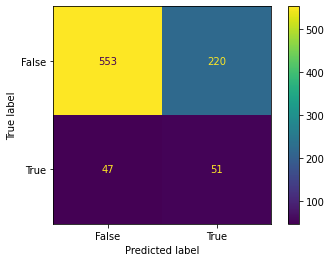

In [13]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt



cm_display.plot()
plt.show()